# Dynamic time warping

In [ ]:
!pip install dtw-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 kB 12.7 MB/s eta 0:00:00


# Libraries
This section contains of all libraries which is needed for this notebook

In [ ]:
from dtw import *
import os
import json
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



# Load annotations

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
WRONG_LIFT_ANNOTATIONS_PATH = "/content/drive/MyDrive/master_thesis/input/smoothed_annotations/test_data/mpi_inf_3dhp_17"
WRONG_LIFT_GOLDEN_STANDART_PATH = f"/content/drive/MyDrive/master_thesis/input/smoothed_annotations/test_data/mpi_inf_3dhp_17/golden_trajectory.json"

GOOD_LIFT_ANNOTATIONS_PATH = "/content/drive/MyDrive/master_thesis/input/smoothed_annotations/mpi_inf_3dhp_17"
GOOD_LIFT_GOLDEN_STANDART_PATH = "/content/drive/MyDrive/master_thesis/input/smoothed_annotations/mpi_inf_3dhp_17/golden_trajectory.json"

EXTRA_LIFT_ANNOTATIONS_PATH = "/content/drive/MyDrive/master_thesis/input/smoothed_annotations/extra_data/mpi_inf_3dhp_17"
EXTRA_LIFT_GOLDEN_STANDART_PATH = "/content/drive/MyDrive/master_thesis/input/smoothed_annotations/extra_data/mpi_inf_3dhp_17/golden_trajectory.json"

JOINT_NAMES_PATH = "/content/drive/MyDrive/master_thesis/input/mpi_inf_3dhp_17-annotations/joint_names.json"
JOINT_EDGES_PATH = "/content/drive/MyDrive/master_thesis/input/mpi_inf_3dhp_17-annotations/joint_edges.json"


LIST_OF_BAD_SAMPLES = [0, 1, 4, 5, 6, 8, 9, 10, 11, 15, 19] # Badly estimated samples
LIST_OF_GOOD_SAMPLES = [sample for sample in list(range(20)) if sample not in LIST_OF_BAD_SAMPLES] # Samples with good estimation
coordinates_list = ['x', 'z', 'y']


joint_name = []
joint_edges = []

wrong_lift_list = []
wrong_lift_golden_standart = []

good_lift_list = []
good_lift_golden_standart = []

extra_lift_list = []
extra_lift_golden_standart = []

badly_estimated_list = []


In [ ]:
with open(file = JOINT_NAMES_PATH, mode='r') as file:
    joint_name = json.load(file)

with open(file = JOINT_EDGES_PATH, mode='r') as file:
   joint_edges = json.load(file)

In [ ]:
with open(file = WRONG_LIFT_GOLDEN_STANDART_PATH, mode='r') as file:
    wrong_lift_golden_standart = json.load(file)
    wrong_lift_golden_standart = np.array(wrong_lift_golden_standart)

with open(file = GOOD_LIFT_GOLDEN_STANDART_PATH, mode='r') as file:
    good_lift_golden_standart = json.load(file)
    good_lift_golden_standart = np.array(good_lift_golden_standart)

with open(file = EXTRA_LIFT_GOLDEN_STANDART_PATH, mode='r') as file:
    extra_lift_golden_standart = json.load(file)
    extra_lift_golden_standart = np.array(extra_lift_golden_standart)

In [ ]:
for sample in list(range(6)):
    file_path = f"{WRONG_LIFT_ANNOTATIONS_PATH}/sample_{sample}.json"
    with open(file = file_path, mode='r') as file:
        loaded_file = json.load(file)
        wrong_lift_list.append(loaded_file)

wrong_lift_list = [np.array(item) for item in wrong_lift_list]

In [ ]:
for sample in list(range(20)):
    file_path = f"{EXTRA_LIFT_ANNOTATIONS_PATH}/sample_{sample}.json"
    with open(file = file_path, mode='r') as file:
        loaded_file = json.load(file)
        extra_lift_list.append(loaded_file)

extra_lift_list = [np.array(item) for item in extra_lift_list]

In [ ]:
for sample in LIST_OF_GOOD_SAMPLES:
    file_path = f"{GOOD_LIFT_ANNOTATIONS_PATH}/sample_{sample}.json"
    with open(file = file_path, mode='r') as file:
        loaded_file = json.load(file)
        good_lift_list.append(loaded_file)

good_lift_list = [np.array(item) for item in good_lift_list]

In [ ]:
for sample in LIST_OF_BAD_SAMPLES:
    file_path = f"{GOOD_LIFT_ANNOTATIONS_PATH}/sample_{sample}.json"
    with open(file = file_path, mode='r') as file:
        loaded_file = json.load(file)
        badly_estimated_list.append(loaded_file)

badly_estimated_list = [np.array(item) for item in badly_estimated_list]

In [ ]:
joint_name

['htop',
 'neck',
 'rsho',
 'relb',
 'rwri',
 'lsho',
 'lelb',
 'lwri',
 'rhip',
 'rkne',
 'rank',
 'lhip',
 'lkne',
 'lank',
 'pelv',
 'spin',
 'head']

In [ ]:
def get_dtw(query, reference, verbose = True):
    print('Original series:')
    fig = plt.figure()
    plt.plot(query)
    plt.plot(reference)
    plt.legend(['query', 'reference'])
    plt.show()

    print('-'*10)

    al = dtw(query, reference, keep_internals=True)
    print('[minimum distance]: {0}\t[normalized distance]: {1}'.format(al.distance, al.normalizedDistance))

    fig = plt.figure()
    plt.plot(al.index1)
    plt.plot(al.index2)
    plt.legend(['query_index', 'reference_index'])
    plt.show()
    print('-'*10)

    al.plot(type="threeway")
    print('-'*10)

    al.plot(type="twoway")

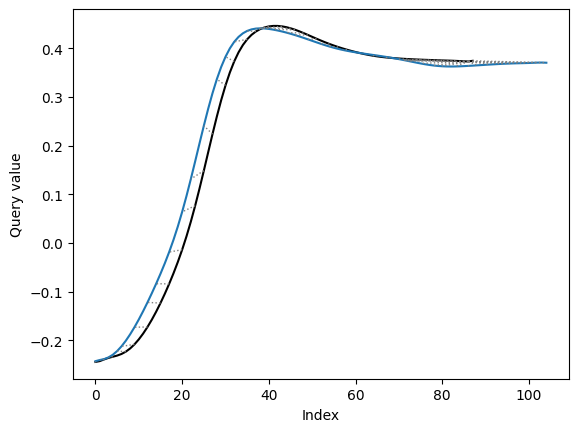

In [ ]:
alignment = dtw(good_lift_list[3][:,7,2], good_lift_list[1][:,7,2], keep_internals=True)
alignment.plot(type="twoway")  # This creates the plot

# Save the plot to a file
save_path = "/content/drive/MyDrive/master_thesis/output/my_dtw_plot.pdf"  # Replace with your desired path
plt.savefig(save_path, dpi=300)

# Save results for the golden standart

In [ ]:
joint_name

['htop',
 'neck',
 'rsho',
 'relb',
 'rwri',
 'lsho',
 'lelb',
 'lwri',
 'rhip',
 'rkne',
 'rank',
 'lhip',
 'lkne',
 'lank',
 'pelv',
 'spin',
 'head']

In [ ]:
import os

In [ ]:
for joint in joint_name:
    for coordinate in coordinates_list:
        directory_path = f"/content/drive/MyDrive/master_thesis/output/dtw/use_case/{joint}/{coordinate}"

        if not os.path.exists(directory_path):
            os.makedirs(directory_path)
            print(f"Directory created: {directory_path}")



Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/htop/x
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/htop/z
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/htop/y
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/neck/x
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/neck/z
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/neck/y
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/rsho/x
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/rsho/z
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/rsho/y
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/relb/x
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/relb/z
Directory created: /content/drive/MyDrive/master_thesis/output/dtw/use_case/relb/y
Dire

/usr/local/lib/python3.10/dist-packages/dtw/dtwPlot.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 6))


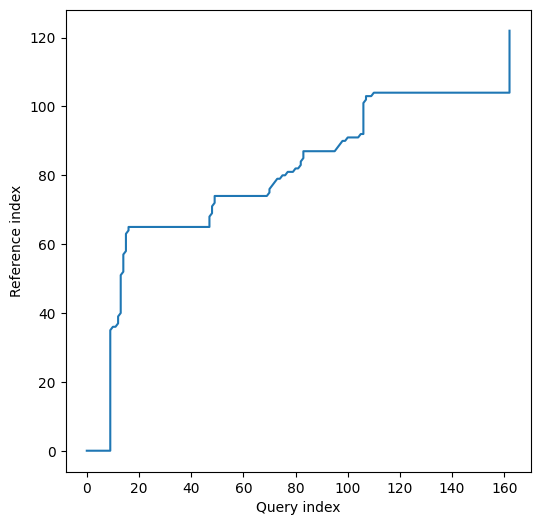

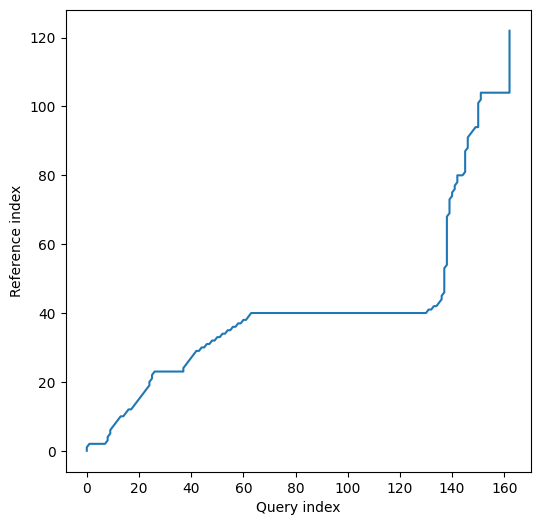

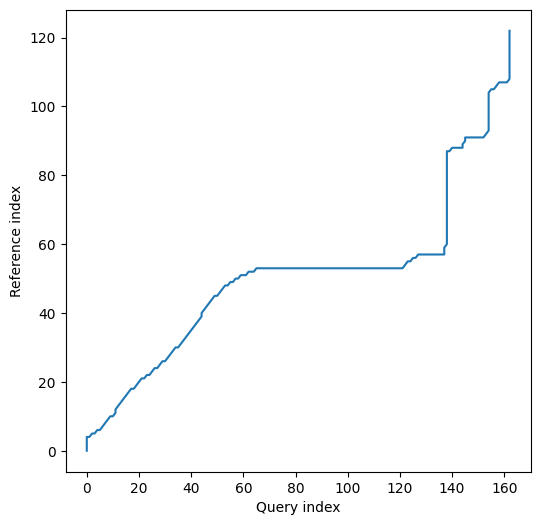

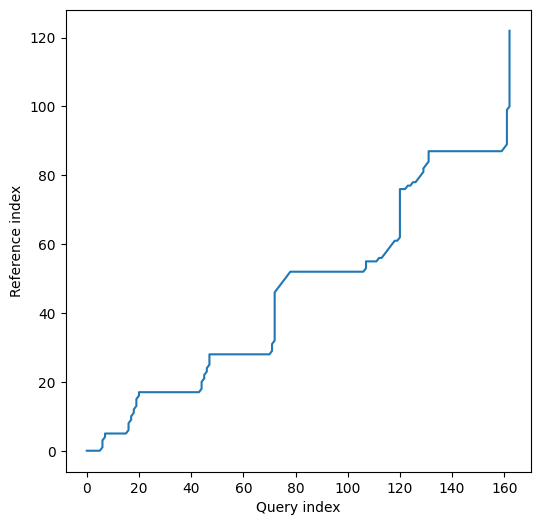

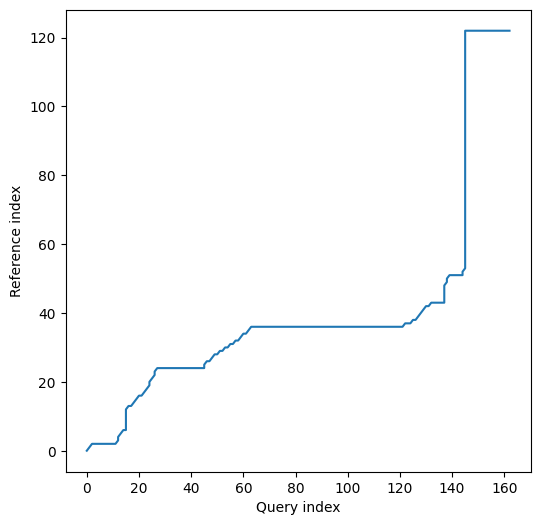

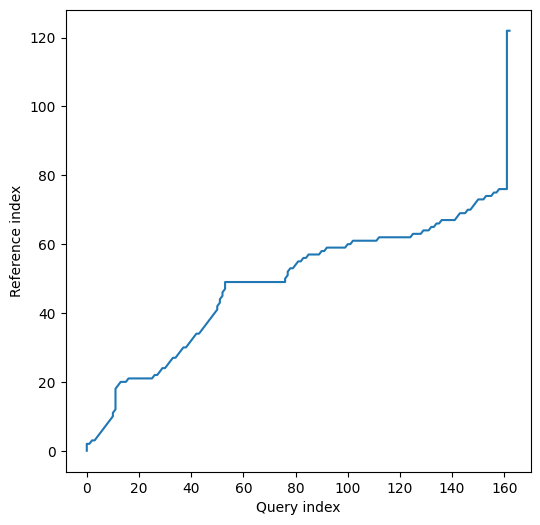

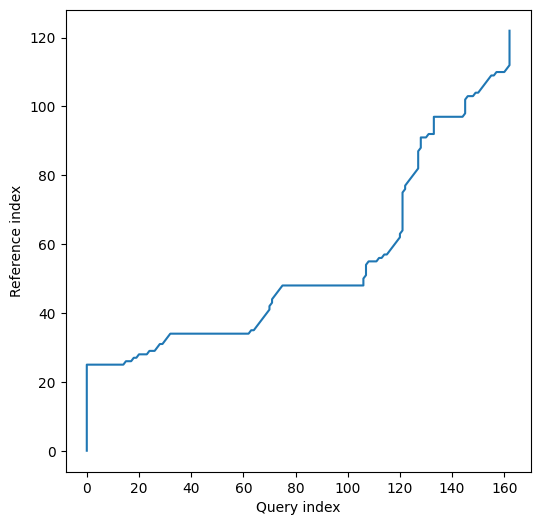

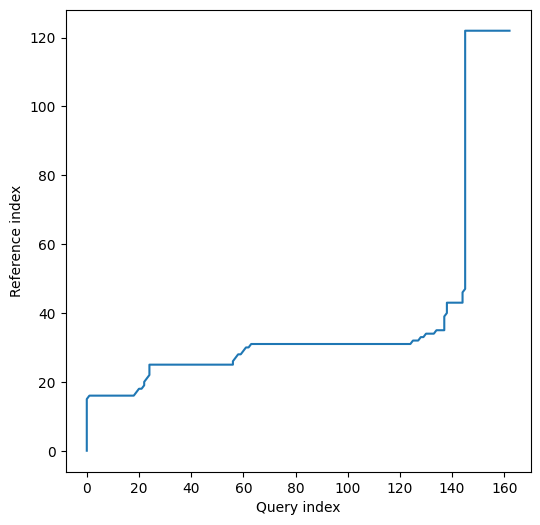

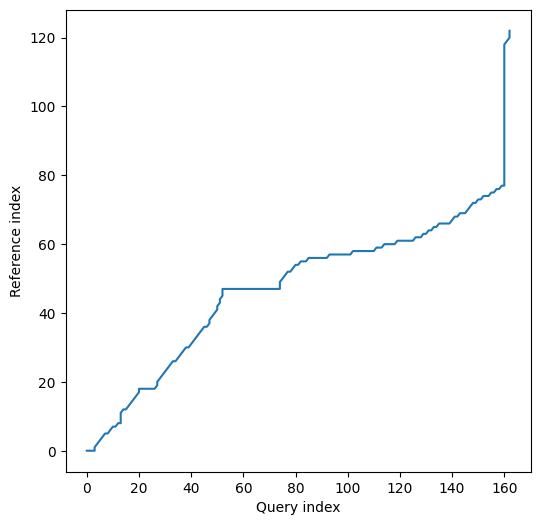

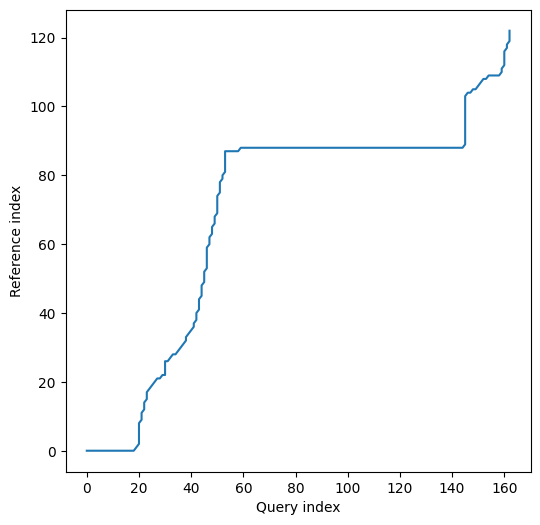

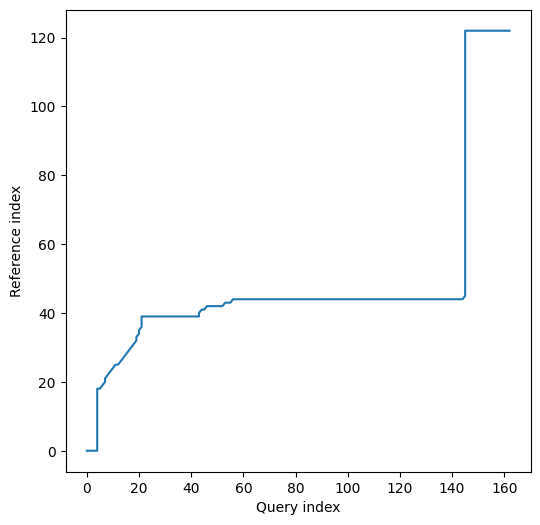

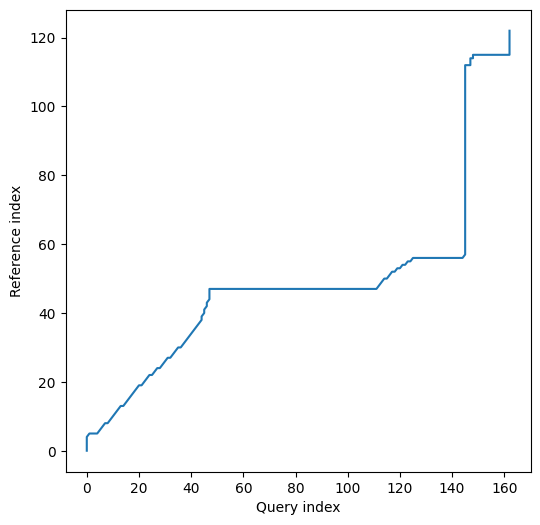

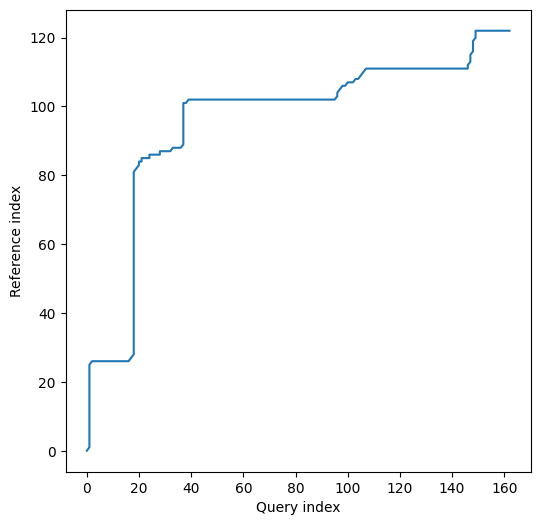

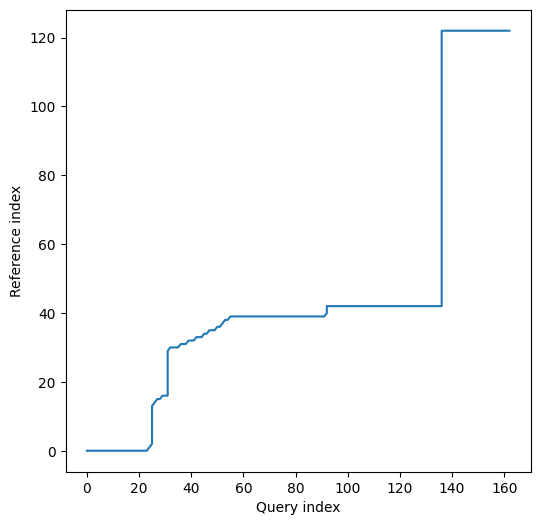

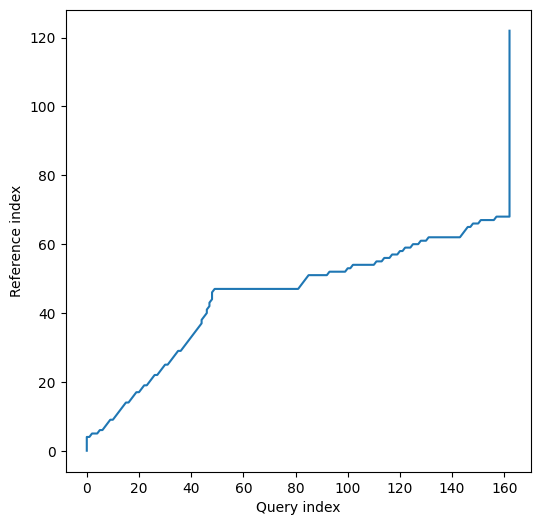

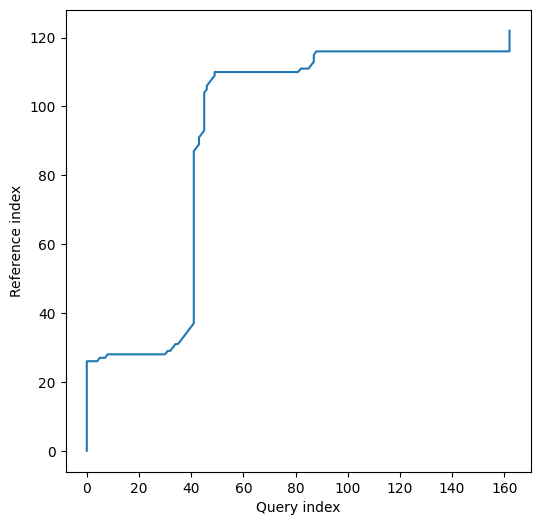

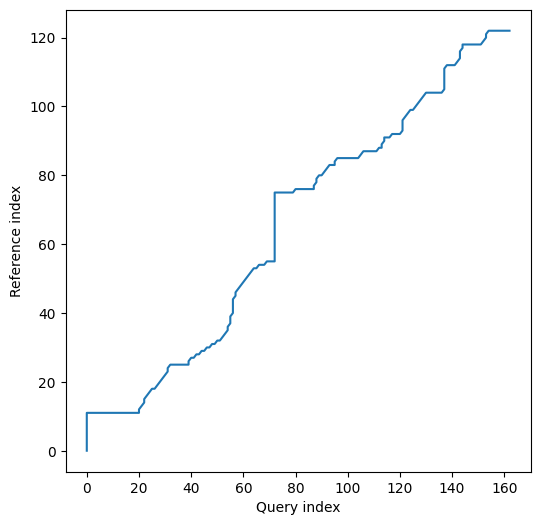

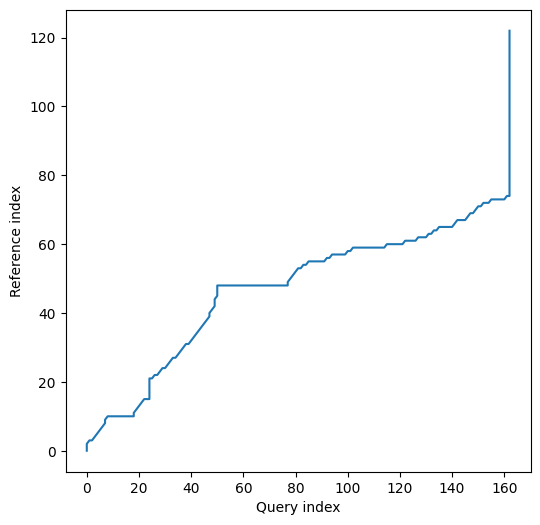

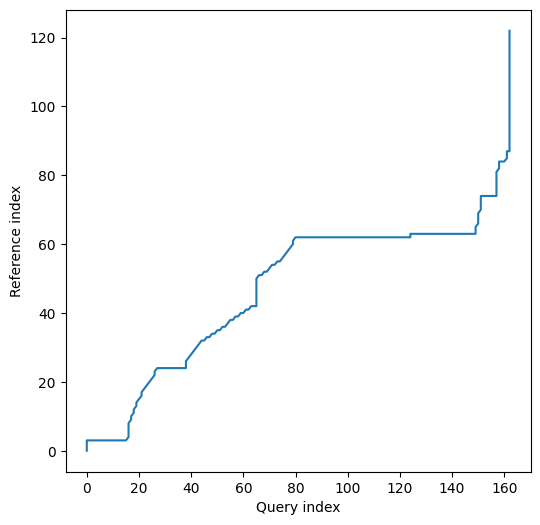

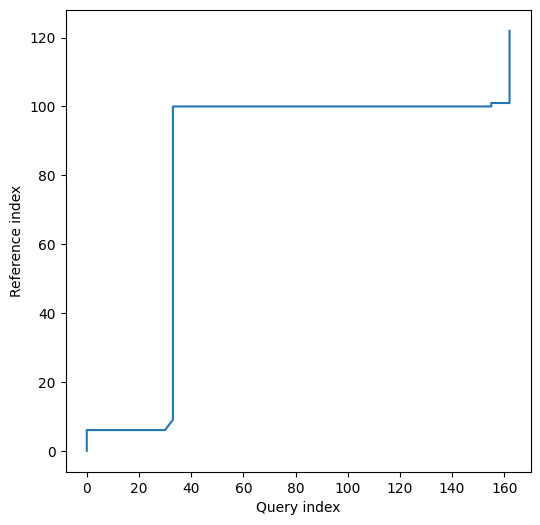

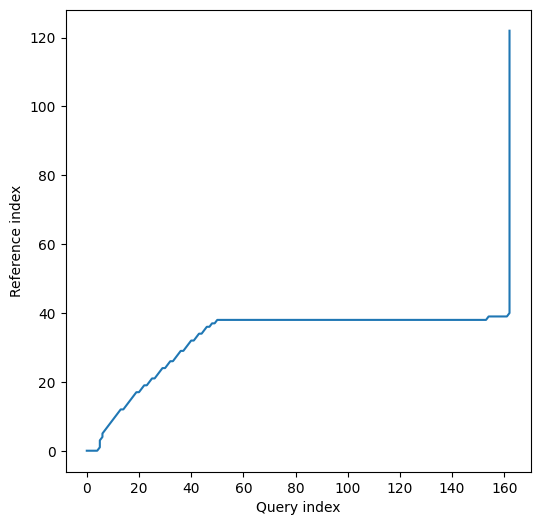

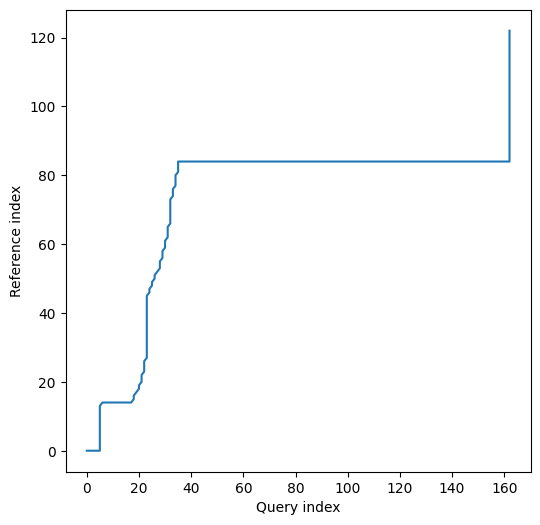

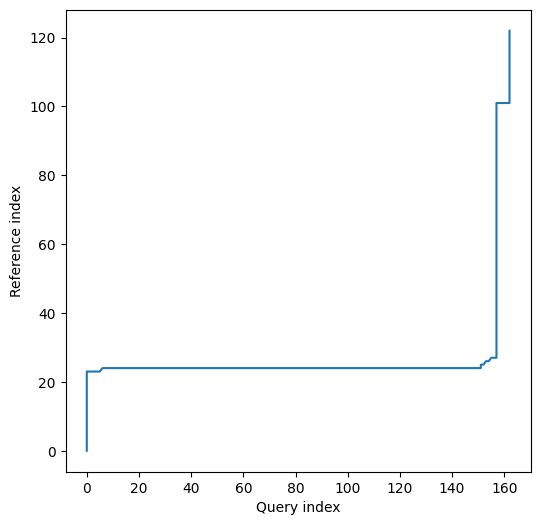

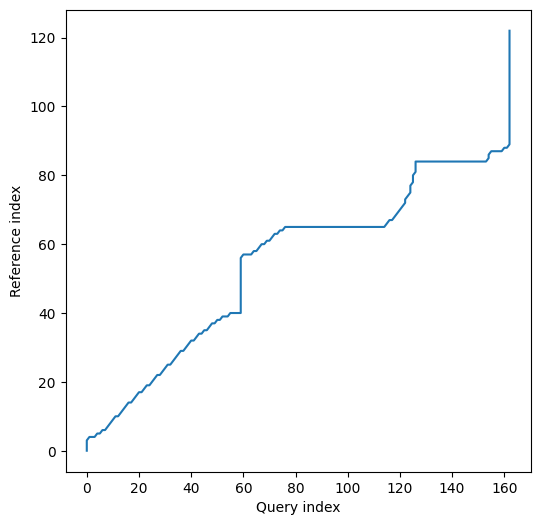

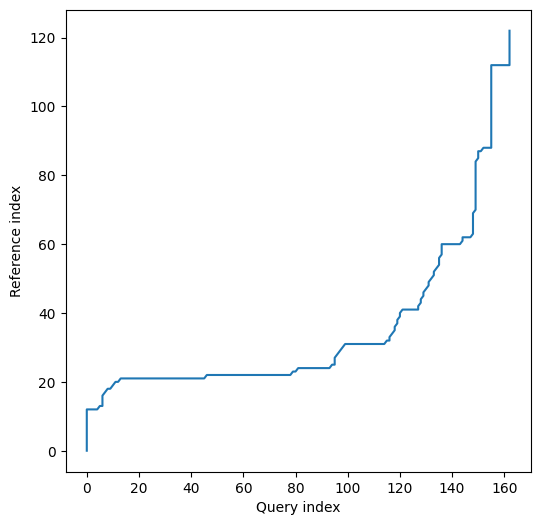

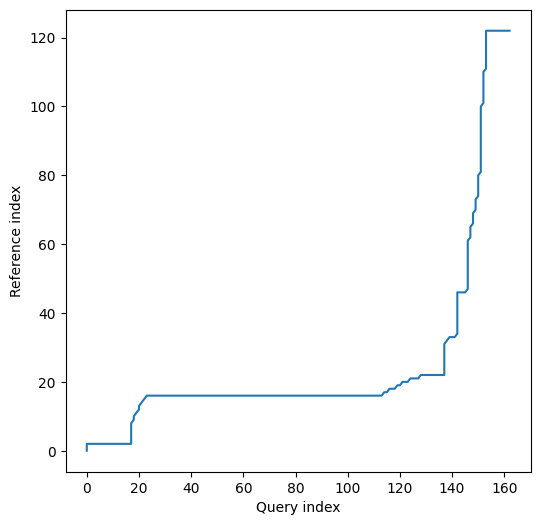

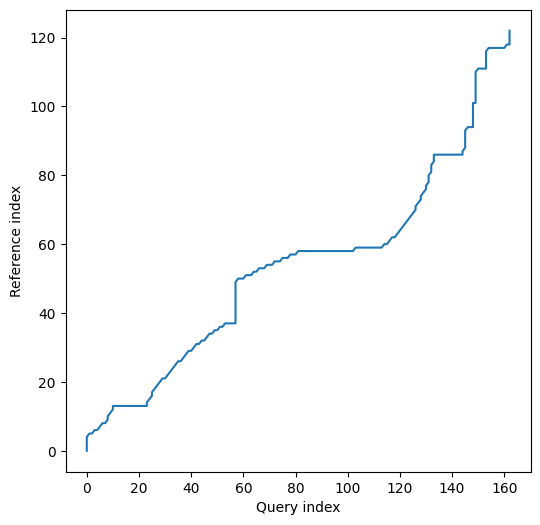

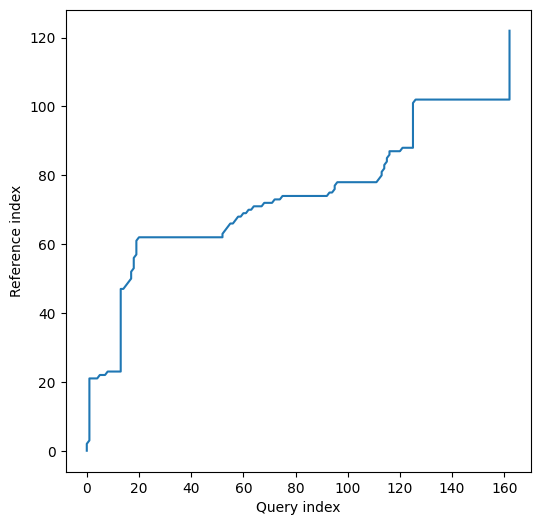

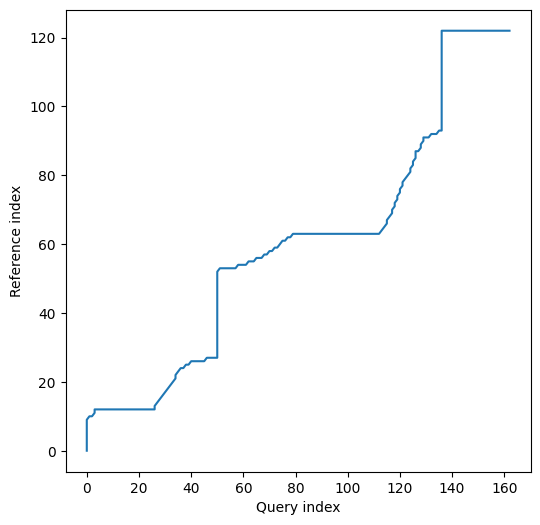

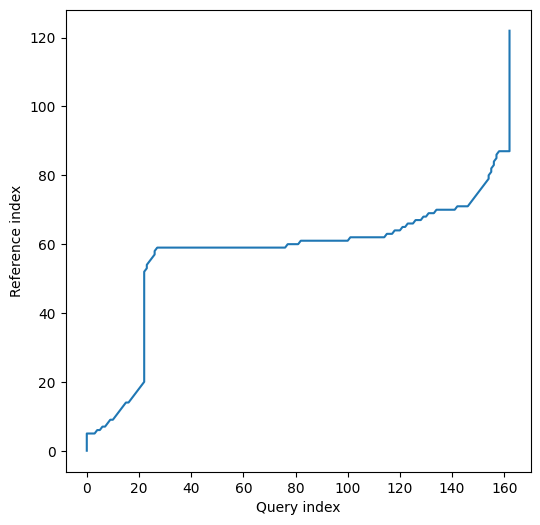

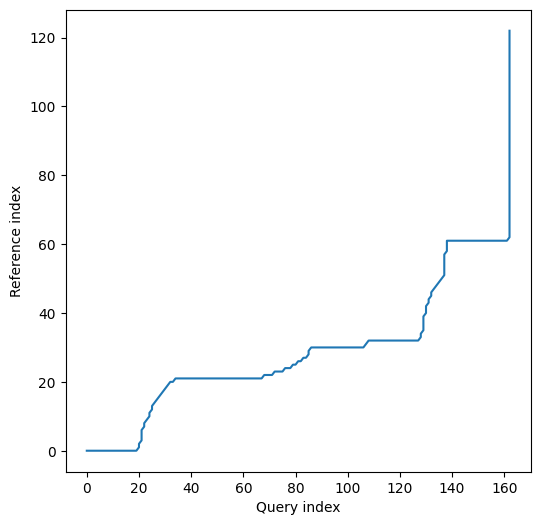

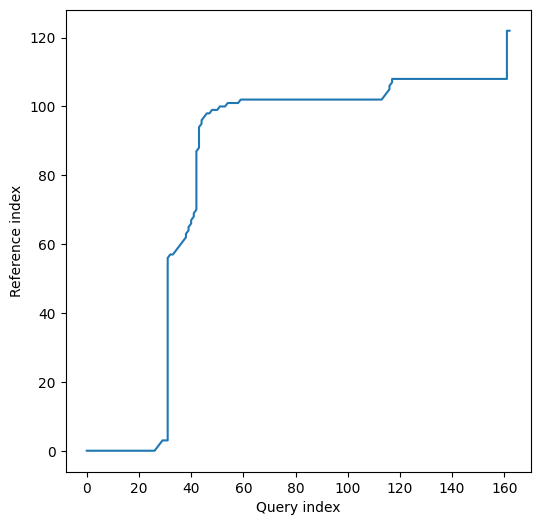

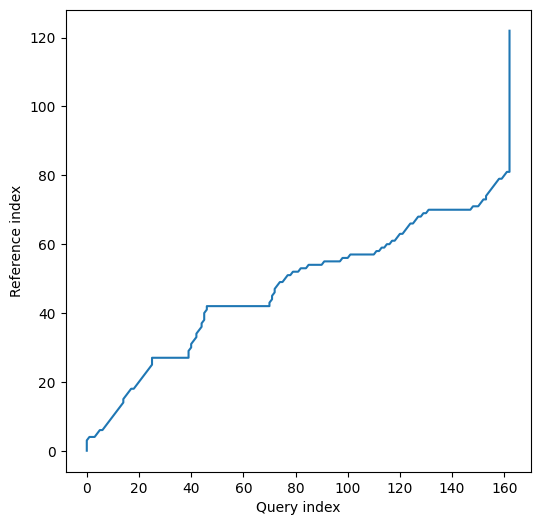

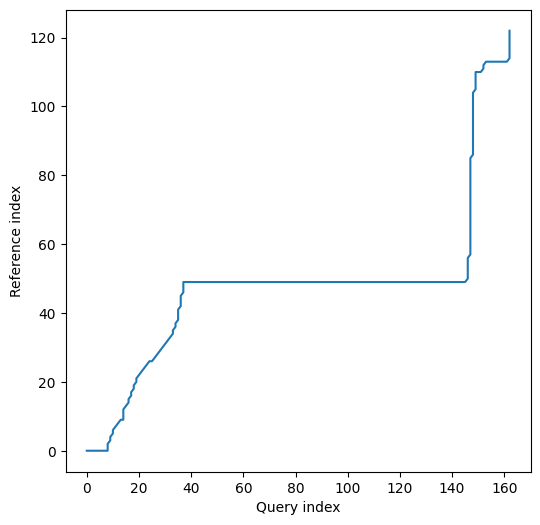

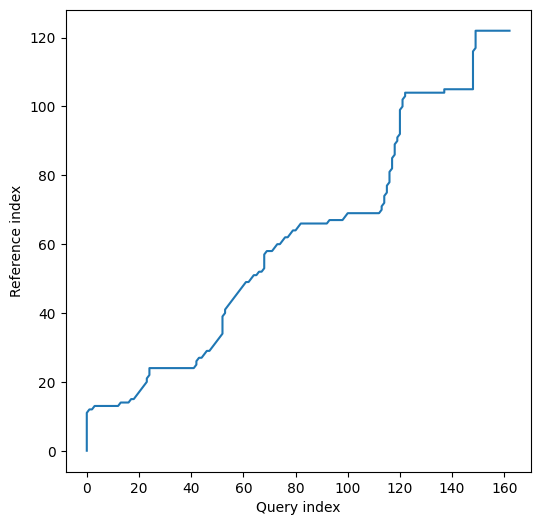

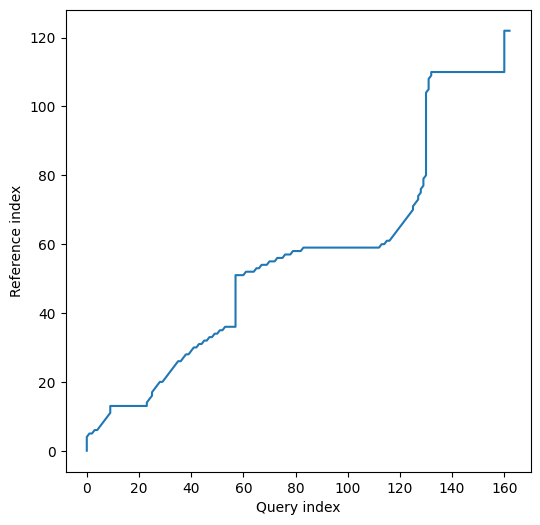

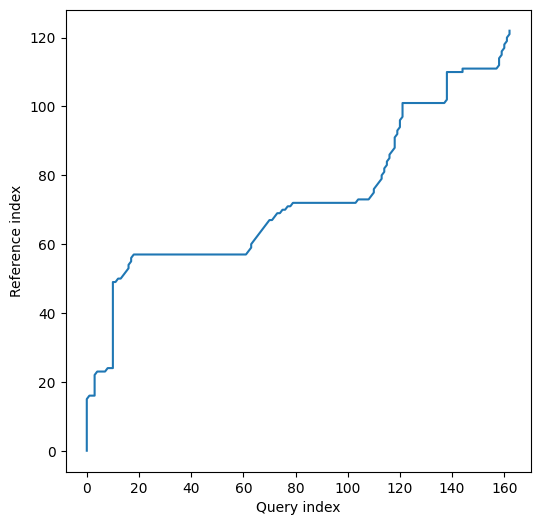

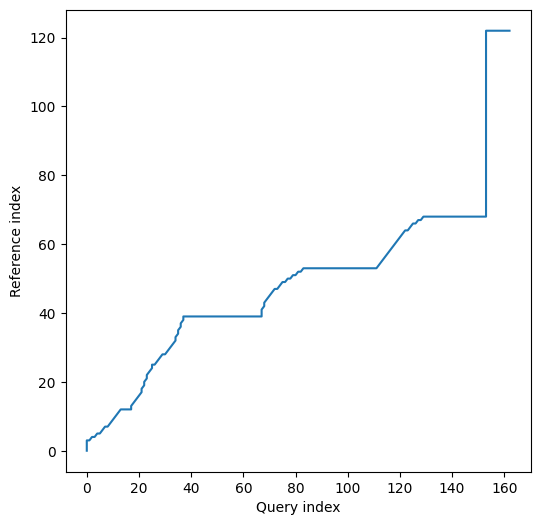

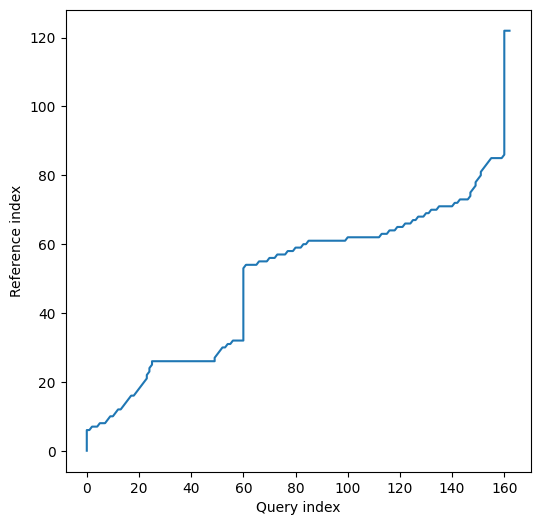

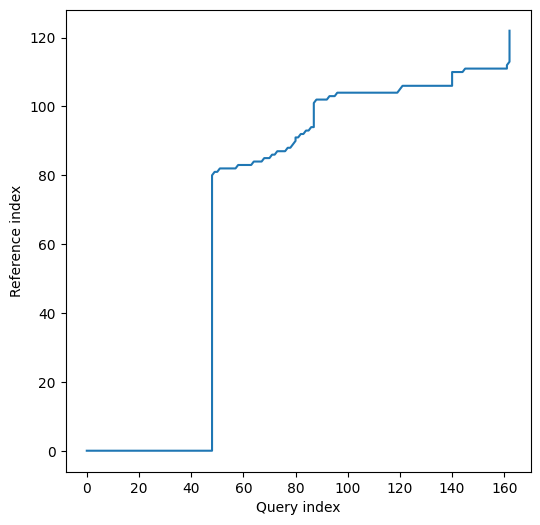

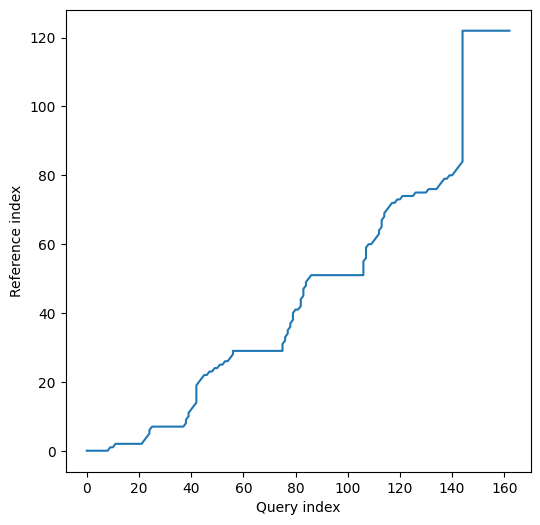

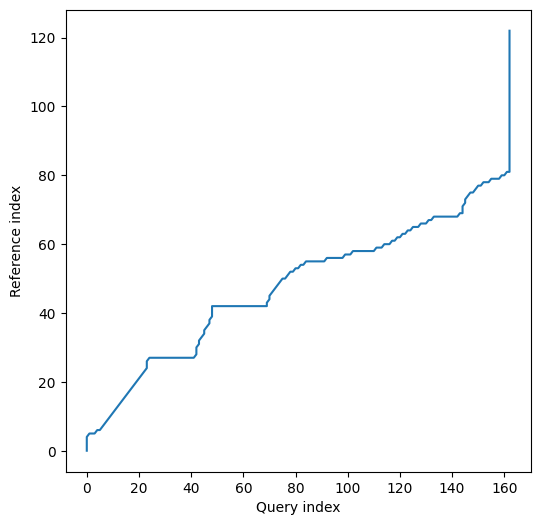

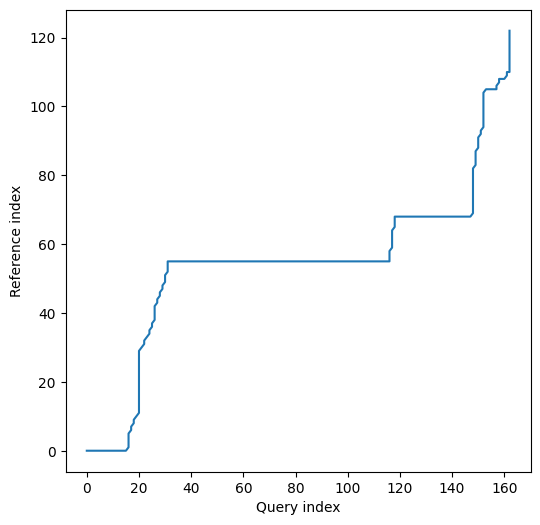

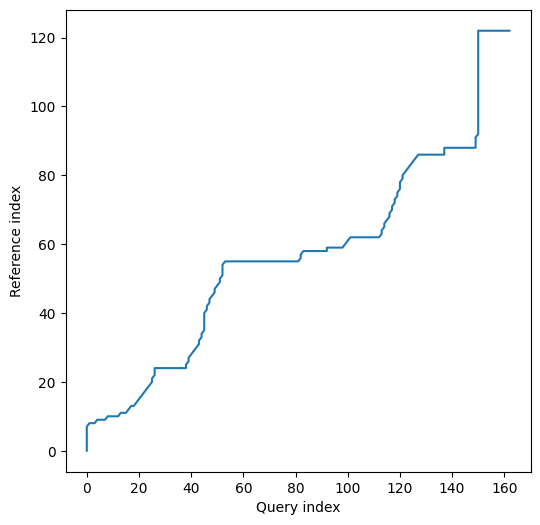

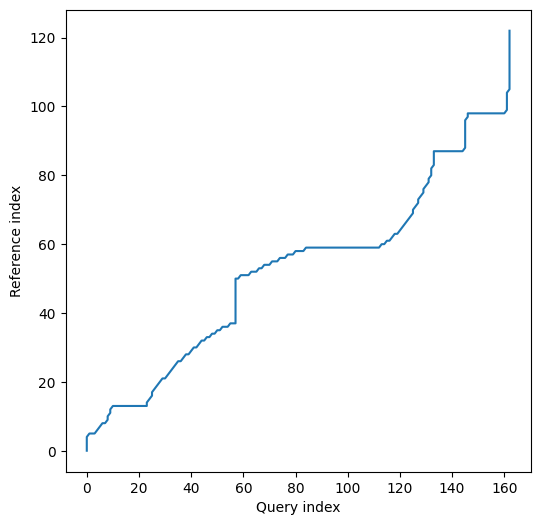

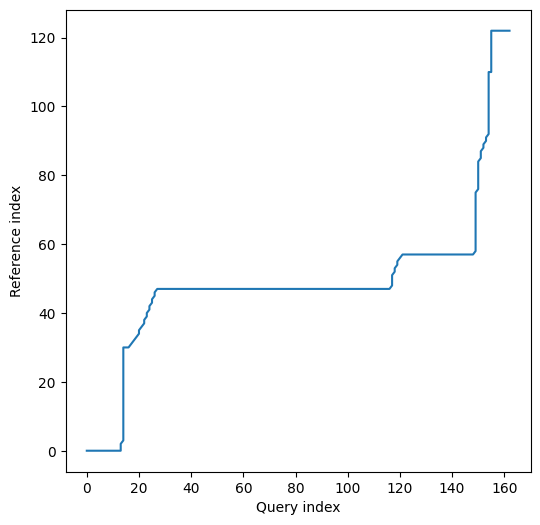

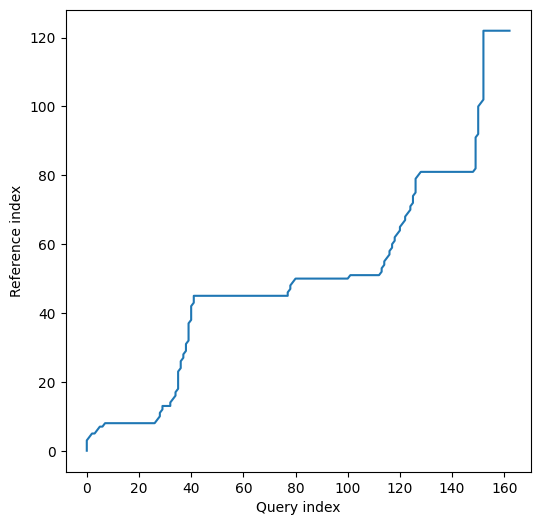

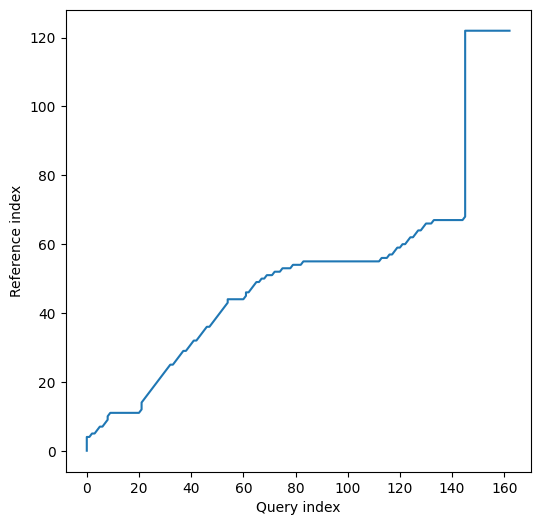

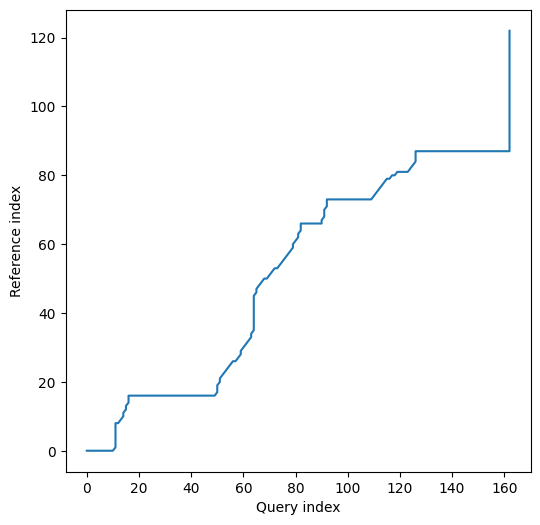

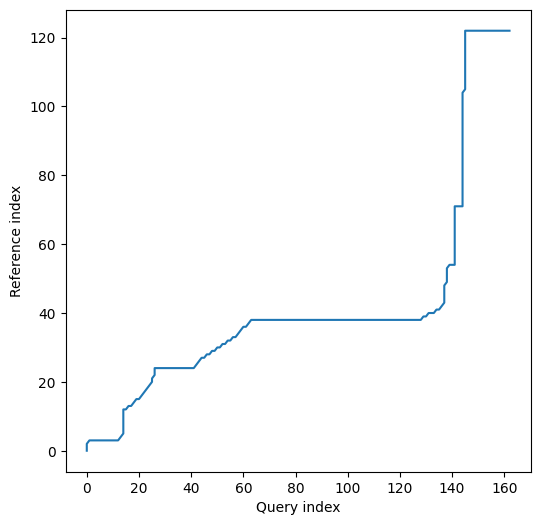

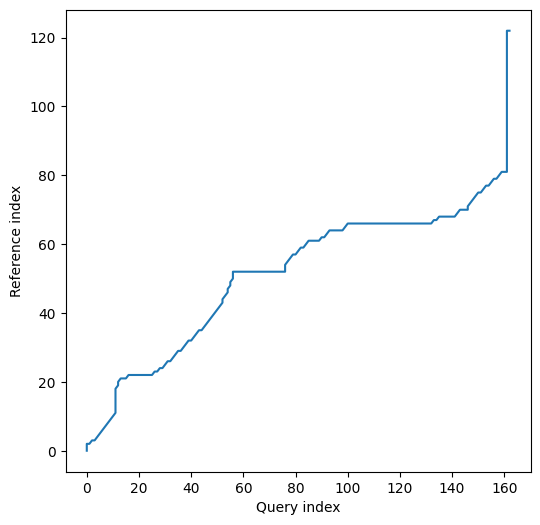

In [ ]:
for joint in range(len(joint_name)):
    for coordinate in range(len(coordinates_list)):
        alignment = dtw(wrong_lift_golden_standart[:,joint,coordinate], good_lift_golden_standart[:,joint,coordinate], keep_internals=True)
        alignment.plot(type="alignment")

        save_path = f"/content/drive/MyDrive/master_thesis/output/dtw/{joint_name[joint]}/{coordinates_list[coordinate]}/alignment.pdf"
        plt.savefig(save_path, dpi=300)

In [ ]:
for joint in range(len(joint_name)):
    for coordinate in range(len(coordinates_list)):
        alignment = dtw(wrong_lift_golden_standart[:,joint,coordinate], good_lift_golden_standart[:,joint,coordinate], keep_internals=True)
        alignment.plot(type="threeway")

        save_path = f"/content/drive/MyDrive/master_thesis/output/dtw/{joint_name[joint]}/{coordinates_list[coordinate]}/threeway.pdf"
        plt.savefig(save_path, dpi=300)

In [ ]:
for joint in range(len(joint_name)):
    for coordinate in range(len(coordinates_list)):
        alignment = dtw(wrong_lift_golden_standart[:,joint,coordinate], good_lift_golden_standart[:,joint,coordinate], keep_internals=True)
        alignment.plot(type="twoway")

        save_path = f"/content/drive/MyDrive/master_thesis/output/dtw/{joint_name[joint]}/{coordinates_list[coordinate]}/twoway.pdf"
        plt.savefig(save_path, dpi=300)

In [ ]:
def get_dtw(query, reference, verbose=True):
    # Create a figure and axes with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

    # --- Plot 1: Original series ---
    axes[0].plot(query)
    axes[0].plot(reference)
    axes[0].legend(['query', 'reference'])
    axes[0].set_title('Original series')

    # --- Calculate DTW ---
    al = dtw(query, reference, keep_internals=True)
    if verbose:
        print('[minimum distance]: {0}\t[normalized distance]: {1}'.format(al.distance, al.normalizedDistance))

    # --- Plot 2: Index alignment ---
    axes[1].plot(al.index1)
    axes[1].plot(al.index2)
    axes[1].legend(['query_index', 'reference_index'])
    axes[1].set_title('Index alignment')

    plt.tight_layout()  # Adjust spacing between subplots

    return fig  # Return the figure object

In [ ]:
get_dtw(wrong_lift_golden_standart[:,7,2], good_lift_golden_standart[:,7,2], verbose=True)

In [ ]:
for joint in range(len(joint_name)):
    for coordinate in range(len(coordinates_list)):
        alignment = get_dtw(wrong_lift_golden_standart[:,joint,coordinate], good_lift_golden_standart[:,joint,coordinate])

        save_path = f"/content/drive/MyDrive/master_thesis/output/dtw/{joint_name[joint]}/{coordinates_list[coordinate]}/original_index_too.pdf"
        alignment.savefig(save_path, dpi=300)

# Generate dataset

In [ ]:
normalized_difference_dictionary = {}
normalized_difference_dictionary['person_id']=[0]
normalized_difference_dictionary['meta_data']=[]

for joint in range(len(joint_name)):
    for coordinate in range(len(coordinates_list)):
        normalized_difference_dictionary[f"{joint_name[joint]}_{coordinates_list[coordinate]}_diff"] = []

for sample in range(len(badly_estimated_list)):
    last_value = normalized_difference_dictionary['person_id'][-1]
    normalized_difference_dictionary['person_id'].append(last_value+1)
    normalized_difference_dictionary['meta_data'].append(0)
    for joint in range(len(joint_name)):
        for coordinate in range(len(coordinates_list)):
            alignment = dtw(badly_estimated_list[sample][:,joint,coordinate], extra_lift_golden_standart[:,joint,coordinate], keep_internals=True)
            normalized_difference_dictionary[f"{joint_name[joint]}_{coordinates_list[coordinate]}_diff"].append(alignment.normalizedDistance)

for sample in range(len(wrong_lift_list)):
    last_value = normalized_difference_dictionary['person_id'][-1]
    normalized_difference_dictionary['person_id'].append(last_value+1)
    normalized_difference_dictionary['meta_data'].append(0)
    for joint in range(len(joint_name)):
        for coordinate in range(len(coordinates_list)):
            alignment = dtw(wrong_lift_list[sample][:,joint,coordinate], extra_lift_golden_standart[:,joint,coordinate], keep_internals=True)
            normalized_difference_dictionary[f"{joint_name[joint]}_{coordinates_list[coordinate]}_diff"].append(alignment.normalizedDistance)

for sample in range(len(good_lift_list)):
    last_value = normalized_difference_dictionary['person_id'][-1]
    normalized_difference_dictionary['person_id'].append(last_value+1)
    normalized_difference_dictionary['meta_data'].append(1)
    for joint in range(len(joint_name)):
        for coordinate in range(len(coordinates_list)):
            alignment = dtw(good_lift_list[sample][:,joint,coordinate], extra_lift_golden_standart[:,joint,coordinate], keep_internals=True)
            normalized_difference_dictionary[f"{joint_name[joint]}_{coordinates_list[coordinate]}_diff"].append(alignment.normalizedDistance)

for sample in range(len(extra_lift_list)):
    last_value = normalized_difference_dictionary['person_id'][-1]
    normalized_difference_dictionary['person_id'].append(last_value+1)
    normalized_difference_dictionary['meta_data'].append(1)
    for joint in range(len(joint_name)):
        for coordinate in range(len(coordinates_list)):
            alignment = dtw(extra_lift_list[sample][:,joint,coordinate], extra_lift_golden_standart[:,joint,coordinate], keep_internals=True)
            normalized_difference_dictionary[f"{joint_name[joint]}_{coordinates_list[coordinate]}_diff"].append(alignment.normalizedDistance)

normalized_difference_dictionary['person_id'].pop()

46

In [ ]:
normalized_difference_dataframe = pd.DataFrame(normalized_difference_dictionary)
normalized_difference_dataframe

,person_id,meta_data,htop_x_diff,htop_z_diff,htop_y_diff,neck_x_diff,neck_z_diff,neck_y_diff,rsho_x_diff,rsho_z_diff,...,lank_y_diff,pelv_x_diff,pelv_z_diff,pelv_y_diff,spin_x_diff,spin_z_diff,spin_y_diff,head_x_diff,head_z_diff,head_y_diff
0,0,0,0.003017,0.084204,0.006428,0.002210,0.036060,0.004298,0.005313,0.027875,...,0.004667,0.001711,0.037515,0.013830,0.005073,0.043676,0.006510,0.001777,0.035054,0.005551
1,1,0,0.021966,0.087666,0.002857,0.011946,0.028582,0.001440,0.038847,0.023538,...,0.004301,0.003854,0.048253,0.010220,0.004608,0.025550,0.006487,0.016170,0.062377,0.002569
2,2,0,0.004812,0.054573,0.007514,0.001534,0.043263,0.002494,0.003406,0.048754,...,0.003771,0.005322,0.015919,0.007882,0.005952,0.008267,0.004418,0.002520,0.040370,0.003931
3,3,0,0.006176,0.020073,0.001761,0.001258,0.016987,0.002372,0.004685,0.013693,...,0.003275,0.003634,0.014070,0.008318,0.004847,0.009880,0.003805,0.002745,0.016342,0.002233
4,4,0,0.042237,0.141109,0.002979,0.030549,0.039023,0.003188,0.072834,0.018631,...,0.015465,0.010188,0.058684,0.012495,0.006892,0.036169,0.009185,0.039927,0.085450,0.003718
5,5,0,0.003422,0.041111,0.005756,0.002252,0.025235,0.001443,0.004249,0.047389,...,0.005270,0.002930,0.005789,0.011556,0.002824,0.008255,0.007981,0.002525,0.029234,0.002525
6,6,0,0.003146,0.086022,0.008699,0.000874,0.018086,0.002936,0.001673,0.029888,...,0.006281,0.004566,0.013241,0.009488,0.004303,0.008058,0.005937,0.001828,0.029162,0.003621
7,7,0,0.021209,0.050597,0.003834,0.021685,0.011170,0.001972,0.017817,0.014759,...,0.003215,0.017357,0.018562,0.008027,0.010114,0.054423,0.004412,0.025570,0.012843,0.002816
8,8,0,0.011990,0.074151,0.007872,0.004242,0.037304,0.002971,0.004502,0.028879,...,0.005444,0.013569,0.015182,0.012318,0.009671,0.002131,0.004464,0.006677,0.042465,0.005684
9,9,0,0.022240,0.090742,0.003315,0.012678,0.023385,0.001086,0.043820,0.016279,...,0.004790,0.005976,0.052895,0.010372,0.004783,0.035444,0.006131,0.017646,0.060902,0.003255


In [ ]:
def plot_and_get_outliers(normalized_difference_dataframe):
    fig, ax = plt.subplots(figsize=(10, 6))

    all_distances = []
    for index, row in normalized_difference_dataframe.iterrows():
        all_distances.extend(row[2:])

    threshold = np.percentile(all_distances, 95)

    outlier_data = []  # List to store outlier information

    for index, row in normalized_difference_dataframe.iterrows():
        colors = ['green' if dist <= threshold else 'red' for dist in row[2:]]
        ax.scatter(range(len(row[2:])), row[2:], label=f"Sample {row['person_id']}", c=colors)

        # Add labels and store outlier data
        num_outliers = 0
        outlier_columns = []  # List to store outlier column names for this row
        max_distance = 0  # Initialize max_distance for this row
        for i, dist in enumerate(row[2:]):
            if dist > threshold:
                ax.text(i, dist, str(row[0]), ha='center', va='bottom', color='black')
                num_outliers += 1
                outlier_columns.append(normalized_difference_dataframe.columns[i + 2])  # Get column name
                max_distance = max(max_distance, dist) # Update max_distance

        if num_outliers > 0:
            outlier_data.append([row['person_id'], num_outliers, round(max_distance,4), outlier_columns])

    ax.set_xlabel("Joint-Coordinate Index")
    ax.set_ylabel("Normalized Distance")
    ax.set_title("Normalized Distances for Different Samples")

    # Create DataFrame for outliers
    outlier_df = pd.DataFrame(outlier_data, columns=['person_id', 'num_outliers', 'max_distance', 'outlier_columns'])
    return fig, outlier_df



<ipython-input-21-1e624a357700>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, dist, str(row[0]), ha='center', va='bottom', color='black')


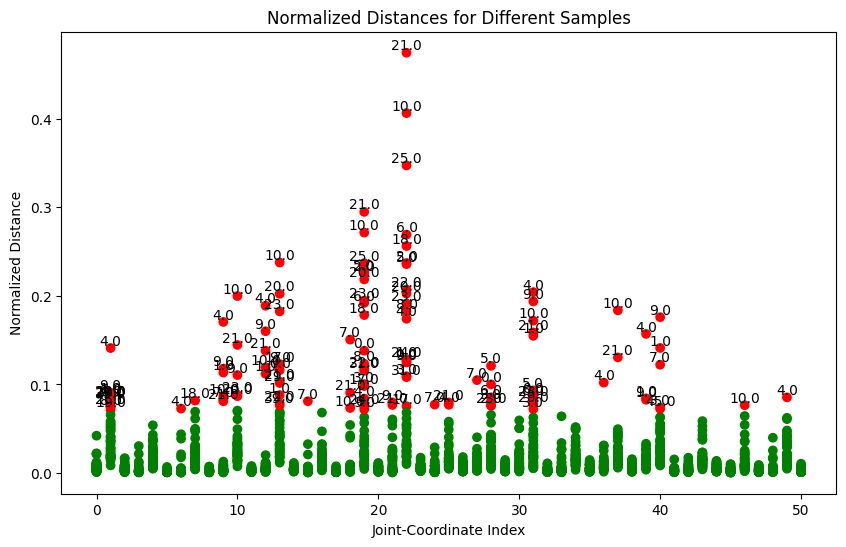

In [ ]:
# Call the function
figure, outlier_df = plot_and_get_outliers(normalized_difference_dataframe)

In [ ]:
outlier_df

,person_id,num_outliers,max_distance,outlier_columns
0,0.0,6,0.1381,"[htop_z_diff, rwri_z_diff, lelb_z_diff, lwri_z..."
1,1.0,8,0.1549,"[htop_z_diff, relb_x_diff, rwri_x_diff, rwri_z..."
2,2.0,3,0.2371,"[lelb_z_diff, lwri_z_diff, rkne_z_diff]"
3,3.0,5,0.1093,"[lelb_z_diff, lwri_z_diff, rkne_z_diff, rank_z..."
4,4.0,11,0.2042,"[htop_z_diff, rsho_x_diff, relb_x_diff, rwri_x..."
5,5.0,4,0.2358,"[lelb_z_diff, lwri_z_diff, rkne_z_diff, rank_z..."
6,6.0,5,0.2691,"[htop_z_diff, lelb_z_diff, lwri_z_diff, rkne_z..."
7,7.0,6,0.1506,"[relb_x_diff, lsho_x_diff, lelb_x_diff, rhip_x..."
8,8.0,3,0.1826,"[htop_z_diff, lelb_z_diff, lwri_z_diff]"
9,9.0,11,0.1937,"[htop_z_diff, relb_x_diff, relb_z_diff, rwri_x..."


In [ ]:
figure.savefig("/content/drive/MyDrive/master_thesis/output/outliers.pdf", dpi=300)

In [ ]:
directory_path = "/content/drive/MyDrive/master_thesis/output/data_frames/"

if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory created: {directory_path}")


Directory created: /content/drive/MyDrive/master_thesis/output/data_frames/


In [ ]:
normalized_difference_dataframe.to_csv("/content/drive/MyDrive/master_thesis/output/data_frames/normalized_difference_dataframe.csv")

In [ ]:
outlier_df.to_csv('/content/drive/MyDrive/master_thesis/output/data_frames/outlier_table_3.csv')

# Extra plots


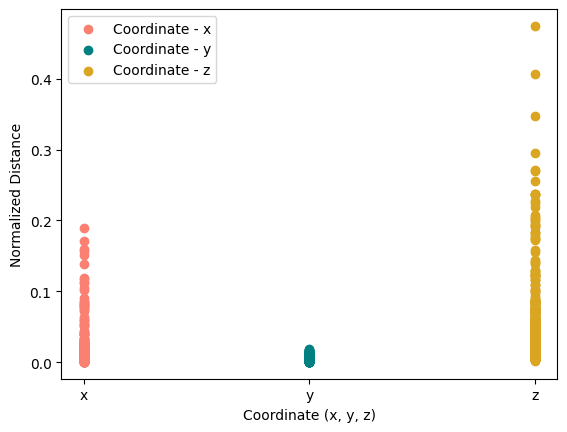

In [ ]:
# 1. Reshape the DataFrame:
# Create a list to store data for the new DataFrame
histogram_data = []

# Iterate through rows and extract relevant information
for index, row in normalized_difference_dataframe.iterrows():
    for joint in joint_name:
        for coordinate in coordinates_list:
            column_name = f"{joint}_{coordinate}_diff"
            histogram_data.append(
                {
                    "Coordinate": coordinate,  # Store coordinate (x, y, z)
                    "Normalized Distance": row[column_name],  # Store normalized distance
                }
            )

# Create the new DataFrame
histogram_df = pd.DataFrame(histogram_data)

# 2. Convert 'Coordinate' column to numerical representation:
# Create a mapping from coordinates to numerical values (0, 1, 2)
coordinate_mapping = {'x': 0, 'y': 1, 'z': 2}
histogram_df['Coordinate_Num'] = histogram_df['Coordinate'].map(coordinate_mapping)


# 3. Create the Scatter Plot:
# Use seaborn for a more visually appealing scatter plot
fig, ax = plt.subplots()

# Define colors for each coordinate
colors = {'x': 'salmon', 'y': 'teal', 'z': 'goldenrod'}

# Scatter plot with color mapping
for coordinate, color in colors.items():
    coordinate_data = histogram_df[histogram_df['Coordinate'] == coordinate]
    ax.scatter(
        coordinate_data['Coordinate_Num'],
        coordinate_data['Normalized Distance'],
        color=color,
        label=f'Coordinate - {coordinate}'
    )

ax.set_xticks(range(len(coordinates_list)))  # Set x-axis ticks
ax.set_xticklabels(['x', 'y', 'z'])  # Set x-axis tick labels
ax.set_xlabel("Coordinate (x, y, z)")
ax.set_ylabel("Normalized Distance")
ax.legend()  # Show legend
fig.savefig('/content/drive/MyDrive/master_thesis/extra_visuals/coordinate_distribution.pdf',dpi=300)
plt.show()

# Two-way, three-way

In [ ]:
output_dir = "/content/drive/MyDrive/master_thesis/output/dtw_threeway_samples/"
os.makedirs(output_dir, exist_ok=True)

# Loop through the data lists and generate plots
data_lists = [badly_estimated_list, wrong_lift_list, good_lift_list, extra_lift_list]
list_names = ['badly_estimated', 'wrong_lift', 'good_lift', 'extra_lift']

for list_index, data_list in enumerate(data_lists):
    for sample_index, sample_data in enumerate(data_list):
        for joint_index in range(len(joint_name)):
            for coordinate_index in range(len(coordinates_list)):
                # Calculate DTW and plot
                alignment = dtw(sample_data[:, joint_index, coordinate_index],
                                extra_lift_golden_standart[:, joint_index, coordinate_index],
                                keep_internals=True)
                alignment.plot(type="threeway")

                # Create save path
                save_path = os.path.join(output_dir,
                                        f"{list_names[list_index]}_sample_{sample_index}",
                                        f"{joint_name[joint_index]}_{coordinates_list[coordinate_index]}_threeway.pdf")

                # Create necessary directories
                os.makedirs(os.path.dirname(save_path), exist_ok=True)

                # Save the plot
                plt.savefig(save_path, dpi=300)
                plt.close()  # Close the plot to avoid memory issues

In [ ]:
output_dir = "/content/drive/MyDrive/master_thesis/output/dtw_twoway_samples/"
os.makedirs(output_dir, exist_ok=True)

# Loop through the data lists and generate plots
data_lists = [badly_estimated_list, wrong_lift_list, good_lift_list, extra_lift_list]
list_names = ['badly_estimated', 'wrong_lift', 'good_lift', 'extra_lift']

for list_index, data_list in enumerate(data_lists):
    for sample_index, sample_data in enumerate(data_list):
        for joint_index in range(len(joint_name)):
            for coordinate_index in range(len(coordinates_list)):
                # Calculate DTW and plot
                alignment = dtw(sample_data[:, joint_index, coordinate_index],
                                extra_lift_golden_standart[:, joint_index, coordinate_index],
                                keep_internals=True)
                alignment.plot(type="twoway")

                # Create save path
                save_path = os.path.join(output_dir,
                                        f"{list_names[list_index]}_sample_{sample_index}",
                                        f"{joint_name[joint_index]}_{coordinates_list[coordinate_index]}_twoway.pdf")

                # Create necessary directories
                os.makedirs(os.path.dirname(save_path), exist_ok=True)

                # Save the plot
                plt.savefig(save_path, dpi=300)
                plt.close()  # Close the plot to avoid memory issues